<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Sales Forecasting

### Part 4 Evaluation and Conclusion

---


## Contents:
- [Compare Different Models on SMAPE Loss](#Compare-Different-Models-on-SMAPE-Loss)
- [Conclusion](#Conclusion)
- [Limitations and recommendations](#Limitations-and-Recommendations)

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import simplefilter
simplefilter("ignore", FutureWarning)
%matplotlib inline

In [3]:
from sktime.forecasting.arima import ARIMA, AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import (
    EnsembleForecaster,
    ReducedForecaster,
    TransformedTargetForecaster,
)
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sktime.utils.plotting import plot_series
from sktime.forecasting.fbprophet import Prophet
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

## Compare Different Models on SMAPE Loss

In [4]:
result=pd.read_csv('../Dataset/results.csv')
result

,Unnamed: 0,model,smape_loss
0,0,prophet,0.031872
1,1,lgbm,0.057895
2,2,r_forest,0.058013
3,3,ensemble,0.063478
4,4,xgb,0.067767
5,5,bats,0.070344
6,6,tbats,0.072434
7,7,theta,0.080372
8,8,auto_ets,0.081176
9,9,naive_last_season,0.087535


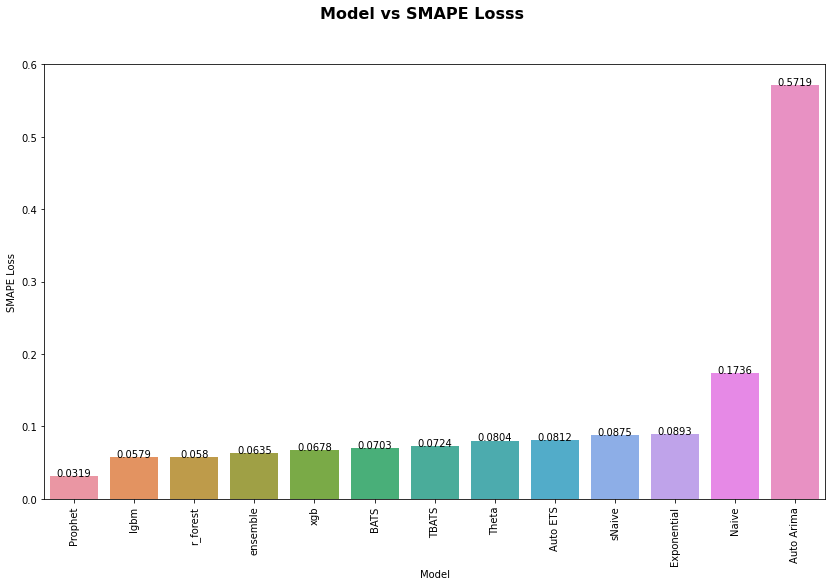

In [11]:

fig_dims = (14, 8)
fig, ax = plt.subplots(figsize=fig_dims)
fig.suptitle('Model vs SMAPE Losss', fontsize = 16, weight = 'bold')

ax=sns.barplot(x = 'model', y = 'smape_loss', data=result);
ax.set_xlabel('Model')
ax.set_ylabel('SMAPE Loss')
ax.set_xticklabels(['Prophet','lgbm','r_forest','ensemble','xgb','BATS','TBATS','Theta','Auto ETS',
                    'sNaive','Exponential' ,'Naive' ,'Auto Arima'], rotation='vertical', fontsize=10)
for index, row in result.iterrows():
    ax.text(row.name,row.smape_loss, round(row.smape_loss,4), color='black', ha="center")
plt.show()

In [1]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "SMAPE Score"]

x.add_row(["Prophet", 0.0465])
x.add_row(["Light Gradient Boost", 0.0579])
x.add_row(["RandomForest", 0.0601])
x.add_row(["Ensemble", 0.631])
x.add_row(["XGBoost", 0.678])
x.add_row(["BATS", 0.703])
x.add_row(["TBATS", 0.0724])
x.add_row(["Theta", 0.0804])
x.add_row(["Auto ETS", 0.0812])
x.add_row(["Seasonal Naive", 0.0875])
x.add_row(["Exponential Smoothing", 0.0893])
x.add_row(["Naive Approach", 0.1736])
x.add_row(["Auto ARIMA", 0.5719])
print(x)

+-----------------------+-------------+
|         Model         | SMAPE Score |
+-----------------------+-------------+
|        Prophet        |    0.0465   |
|  Light Gradient Boost |    0.0579   |
|      RandomForest     |    0.0601   |
|        Ensemble       |    0.631    |
|        XGBoost        |    0.678    |
|          BATS         |    0.703    |
|         TBATS         |    0.0724   |
|         Theta         |    0.0804   |
|        Auto ETS       |    0.0812   |
|     Seasonal Naive    |    0.0875   |
| Exponential Smoothing |    0.0893   |
|     Naive Approach    |    0.1736   |
|       Auto ARIMA      |    0.5719   |
+-----------------------+-------------+


## Conclusion